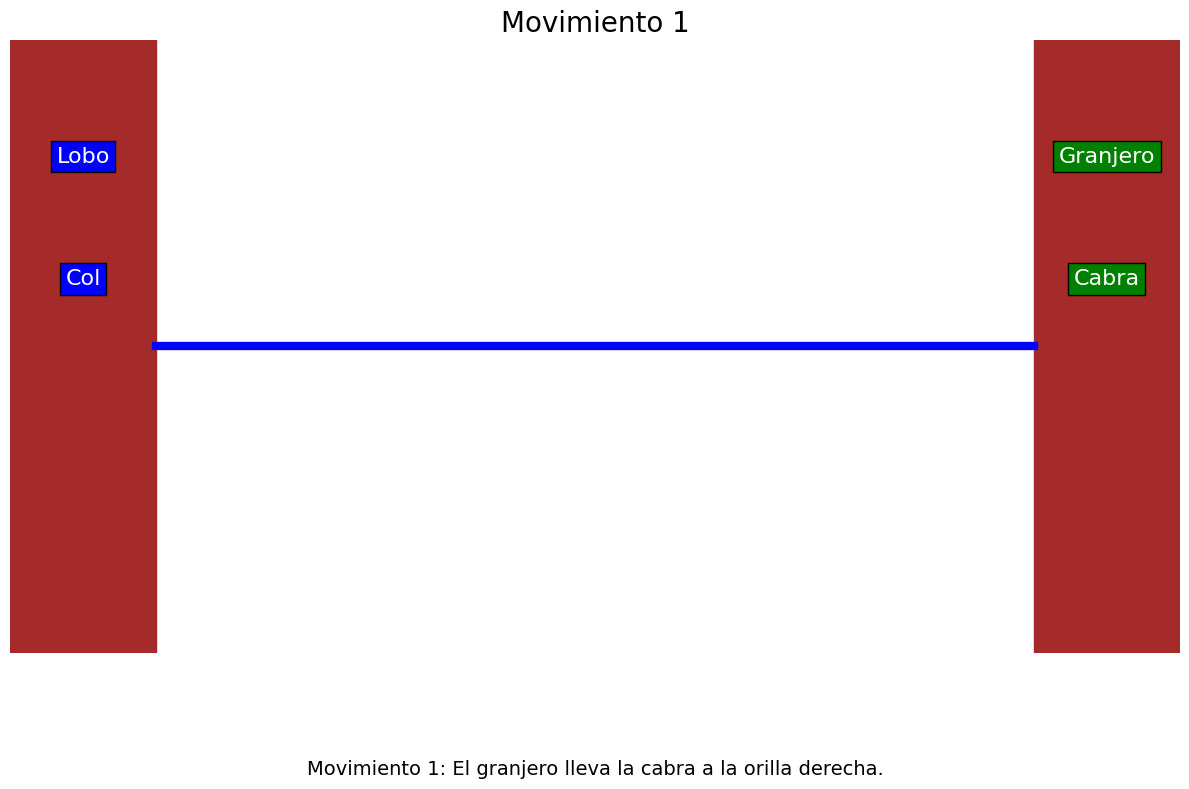

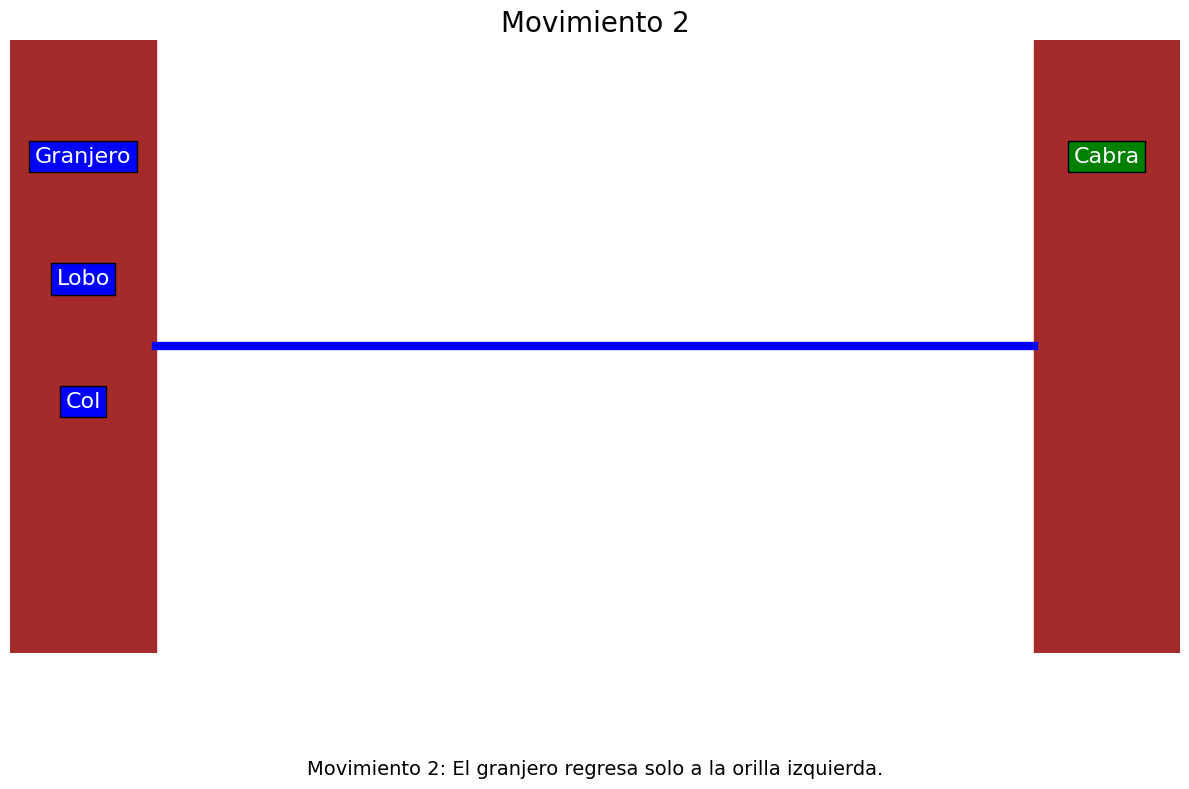

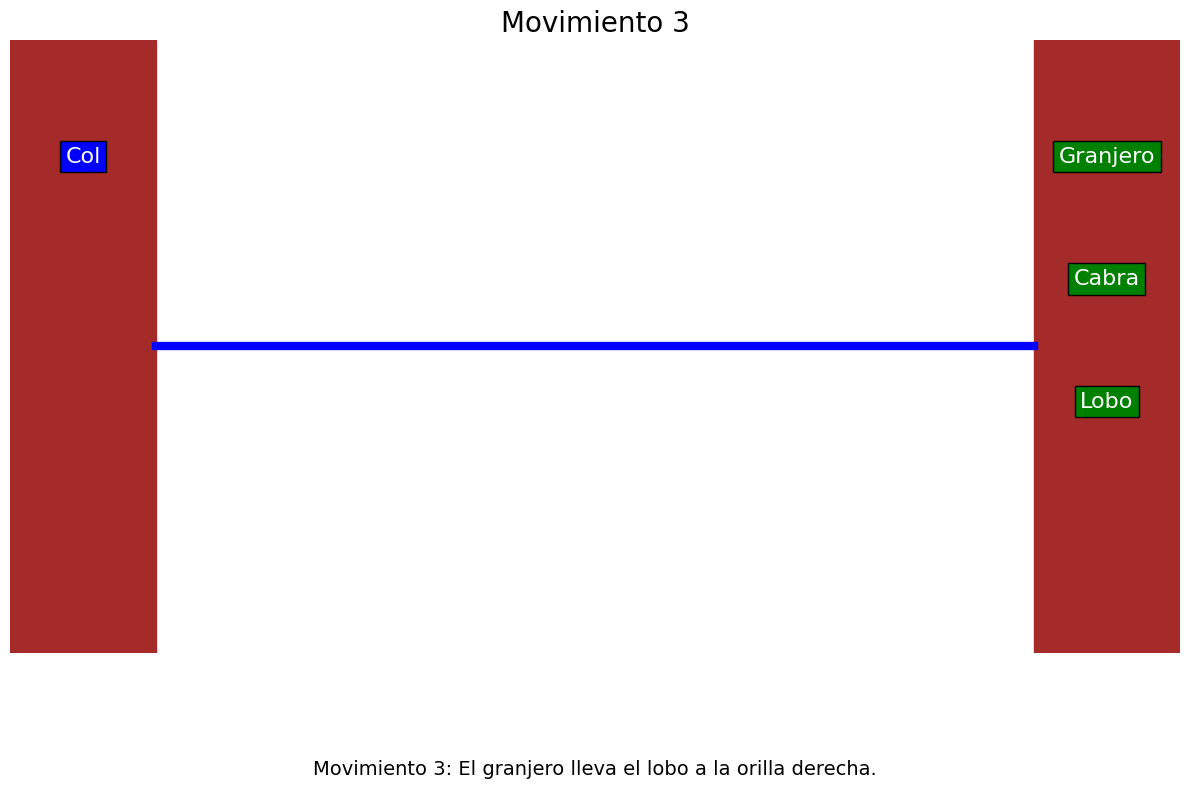

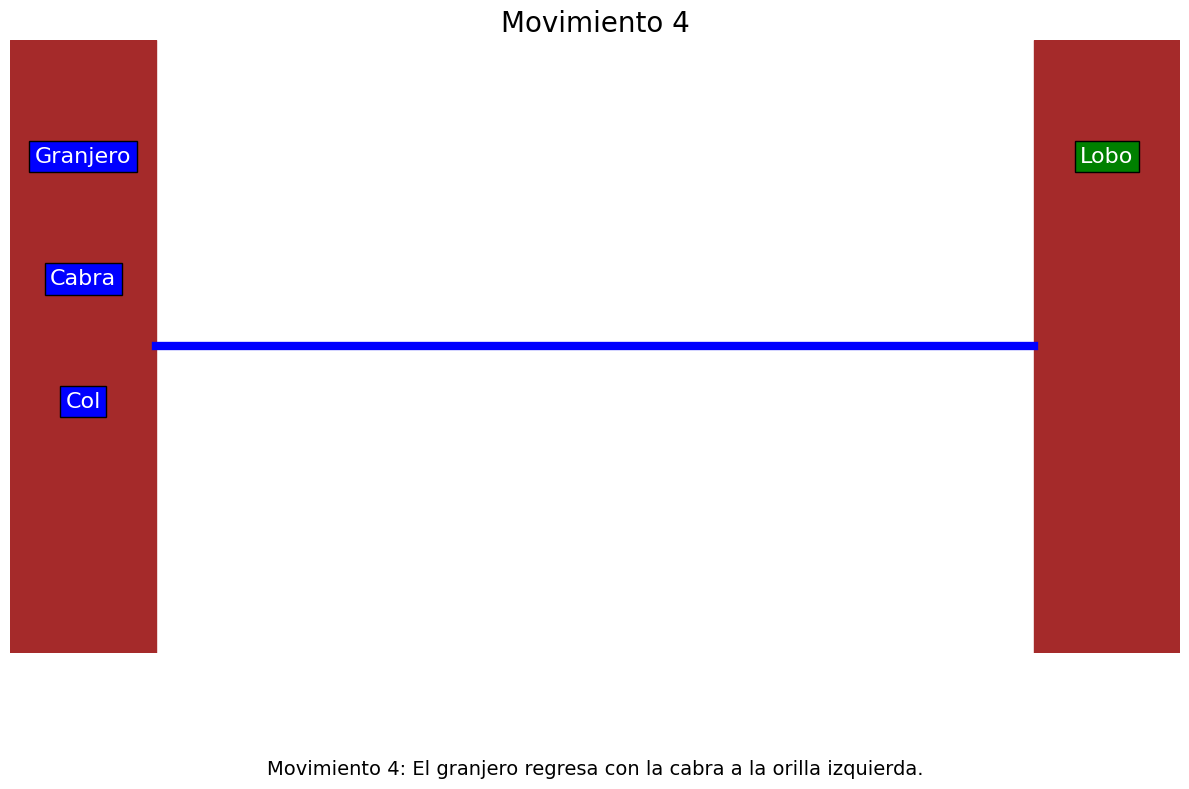

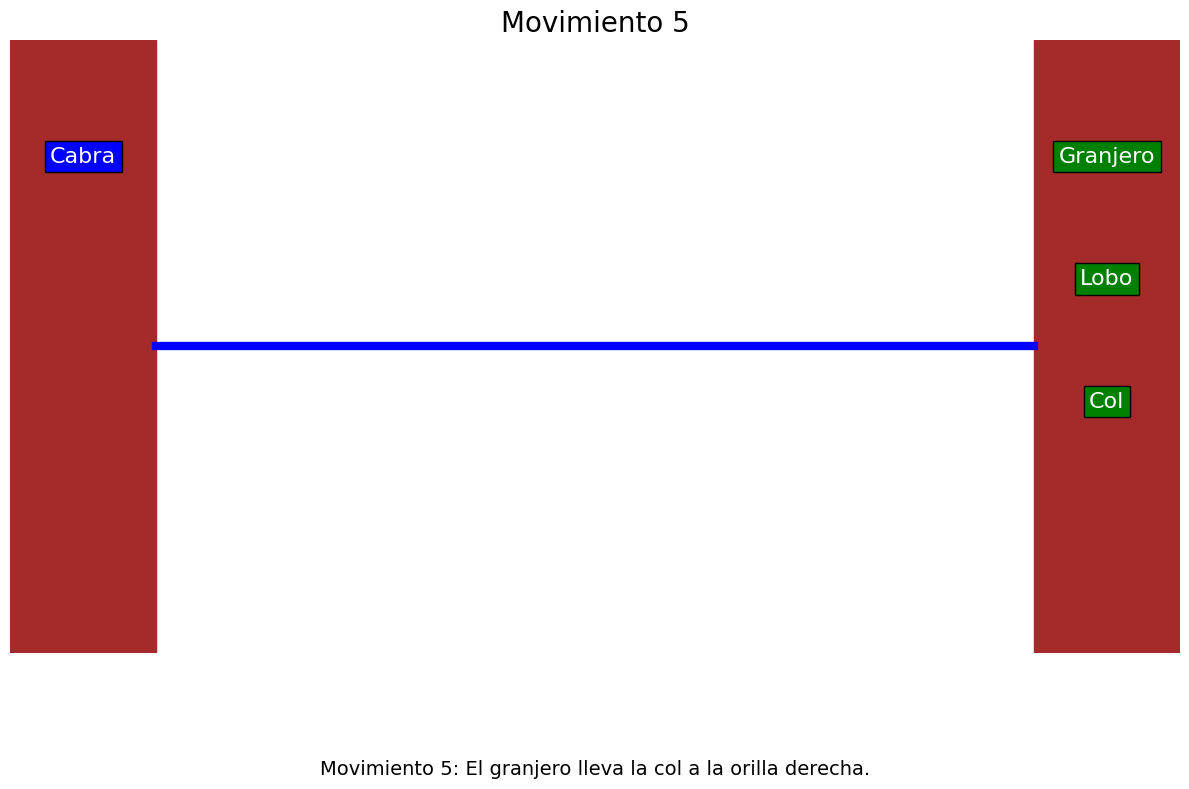

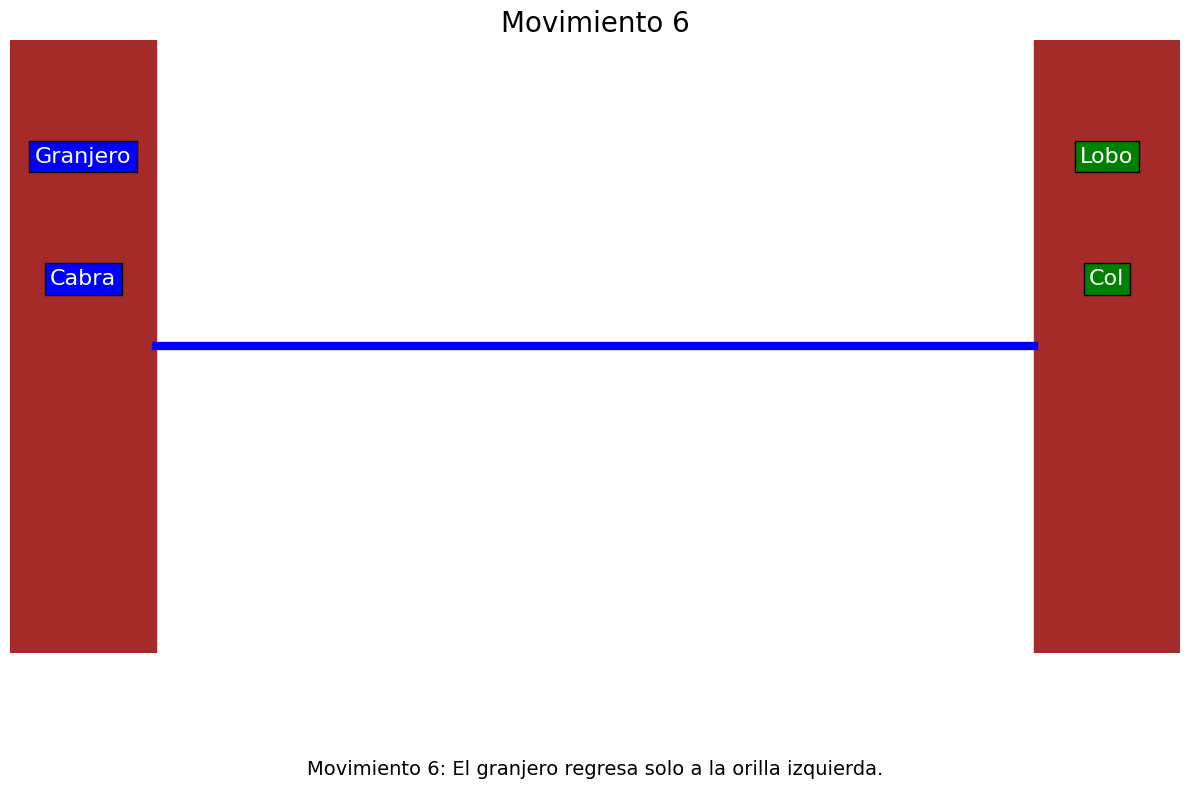

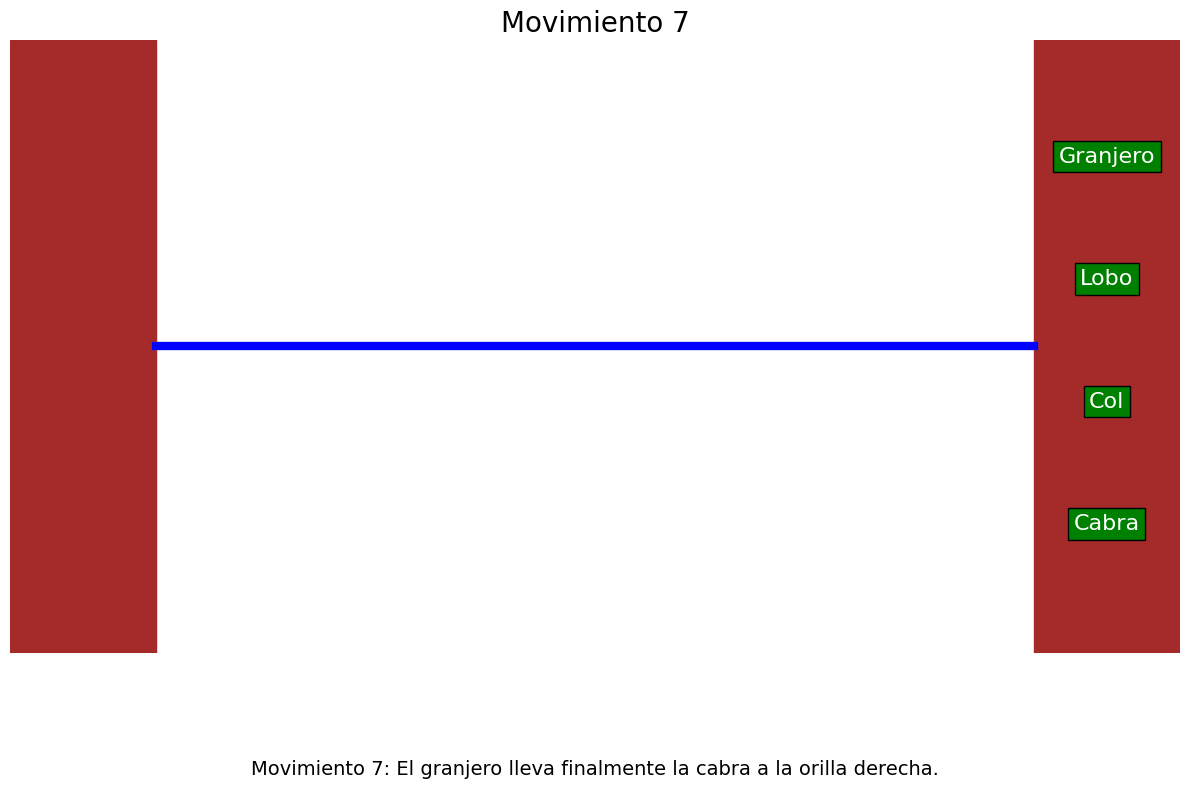

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Lista de estados para cada movimiento, reflejando los cambios correctos
movimientos = [
    (['Lobo', 'Col'], ['Granjero', 'Cabra']),  # Movimiento 1: El granjero lleva la cabra
    (['Granjero', 'Lobo', 'Col'], ['Cabra']),  # Movimiento 2: El granjero regresa solo
    (['Col'], ['Granjero', 'Cabra', 'Lobo']),  # Movimiento 3: El granjero lleva el lobo
    (['Granjero', 'Cabra', 'Col'], ['Lobo']),  # Movimiento 4: El granjero regresa con la cabra
    (['Cabra'], ['Granjero', 'Lobo', 'Col']),  # Movimiento 5: El granjero lleva la col
    (['Granjero', 'Cabra'], ['Lobo', 'Col']),  # Movimiento 6: El granjero regresa solo
    ([], ['Granjero', 'Lobo', 'Col', 'Cabra'])  # Movimiento 7: El granjero lleva la cabra
]

# Lista de explicaciones para cada movimiento
explicaciones = [
    "Movimiento 1: El granjero lleva la cabra a la orilla derecha.",
    "Movimiento 2: El granjero regresa solo a la orilla izquierda.",
    "Movimiento 3: El granjero lleva el lobo a la orilla derecha.",
    "Movimiento 4: El granjero regresa con la cabra a la orilla izquierda.",
    "Movimiento 5: El granjero lleva la col a la orilla derecha.",
    "Movimiento 6: El granjero regresa solo a la orilla izquierda.",
    "Movimiento 7: El granjero lleva finalmente la cabra a la orilla derecha."
]

# Función para dibujar el estado con explicación
def dibujar_estado_con_explicacion(orilla_izquierda, orilla_derecha, paso, explicacion):
    fig, ax = plt.subplots(figsize=(12, 8))  # Aumenta el tamaño del gráfico para mejor visibilidad

    # Dibujar orillas
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=True, color='brown', label='Orilla Izquierda'))
    ax.add_patch(Rectangle((7, 0), 1, 1, fill=True, color='brown', label='Orilla Derecha'))
    
    # Añadir objetos a la orilla izquierda (color azul)
    for i, obj in enumerate(orilla_izquierda):
        ax.text(0.5, 0.8 - i * 0.2, obj, fontsize=16, ha='center', color='white', bbox=dict(facecolor='blue', edgecolor='black'))
    
    # Añadir objetos a la orilla derecha (color verde)
    for i, obj in enumerate(orilla_derecha):
        ax.text(7.5, 0.8 - i * 0.2, obj, fontsize=16, ha='center', color='white', bbox=dict(facecolor='green', edgecolor='black'))

    # Añadir río
    ax.plot([1, 7], [0.5, 0.5], color='blue', lw=6, label='Río')

    # Añadir el título y la explicación
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.set_title(f'Movimiento {paso + 1}', fontsize=20)
    
    # Añadir la explicación debajo del gráfico
    plt.text(0.5, -0.2, explicacion, fontsize=14, ha='center', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.show()

# Ciclo para mostrar cada estado después de cada movimiento con explicación
for paso, (izquierda, derecha) in enumerate(movimientos):
    dibujar_estado_con_explicacion(izquierda, derecha, paso, explicaciones[paso])


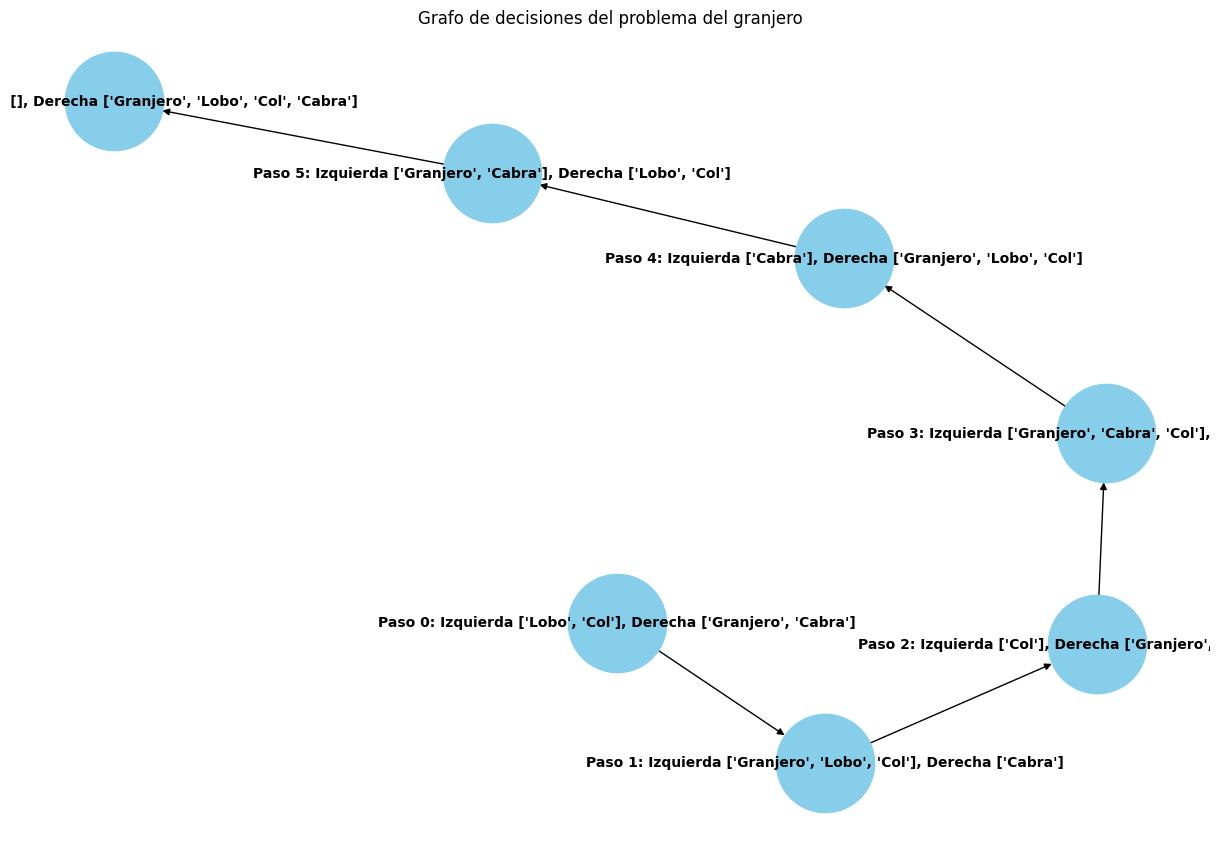

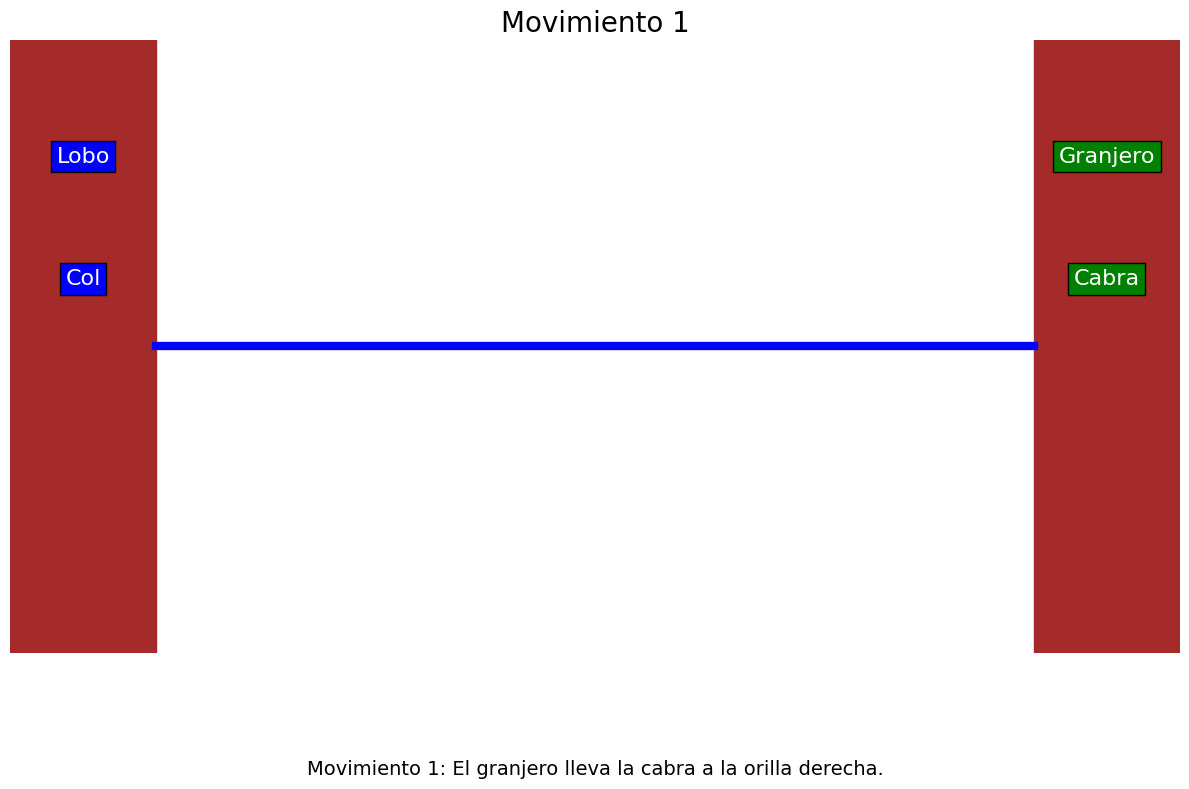

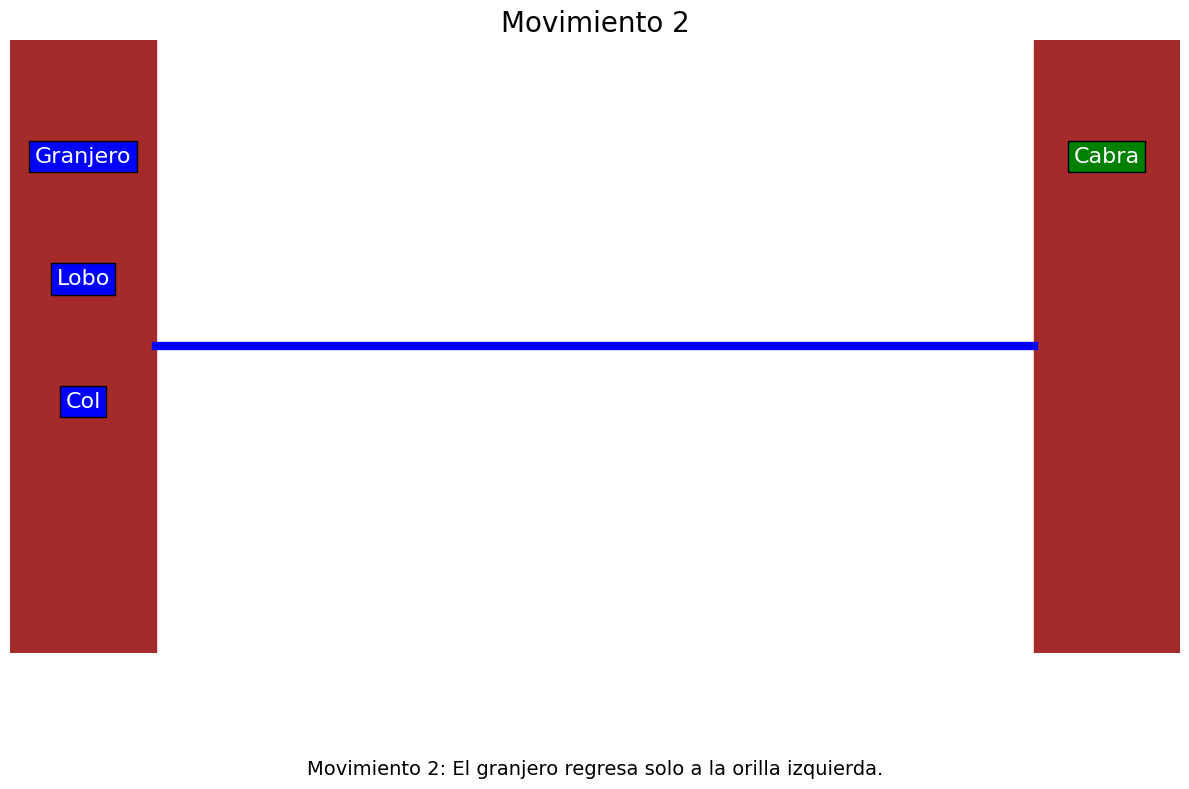

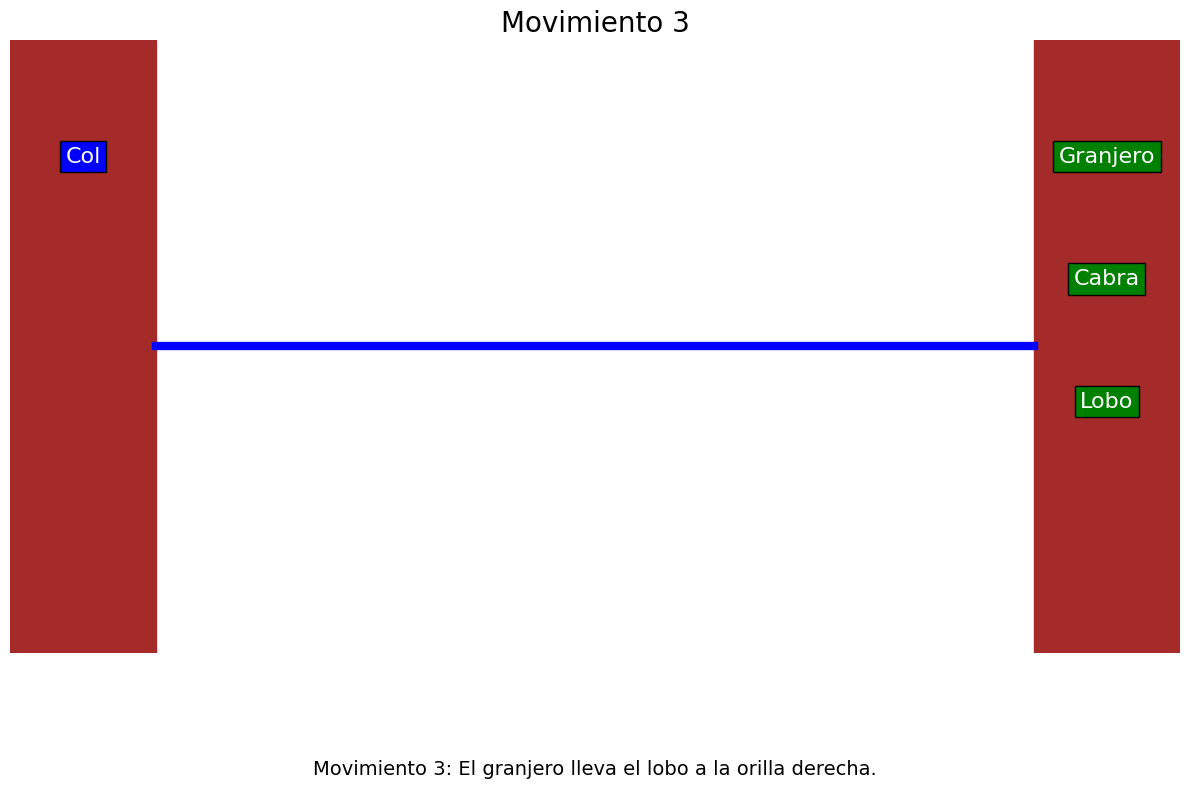

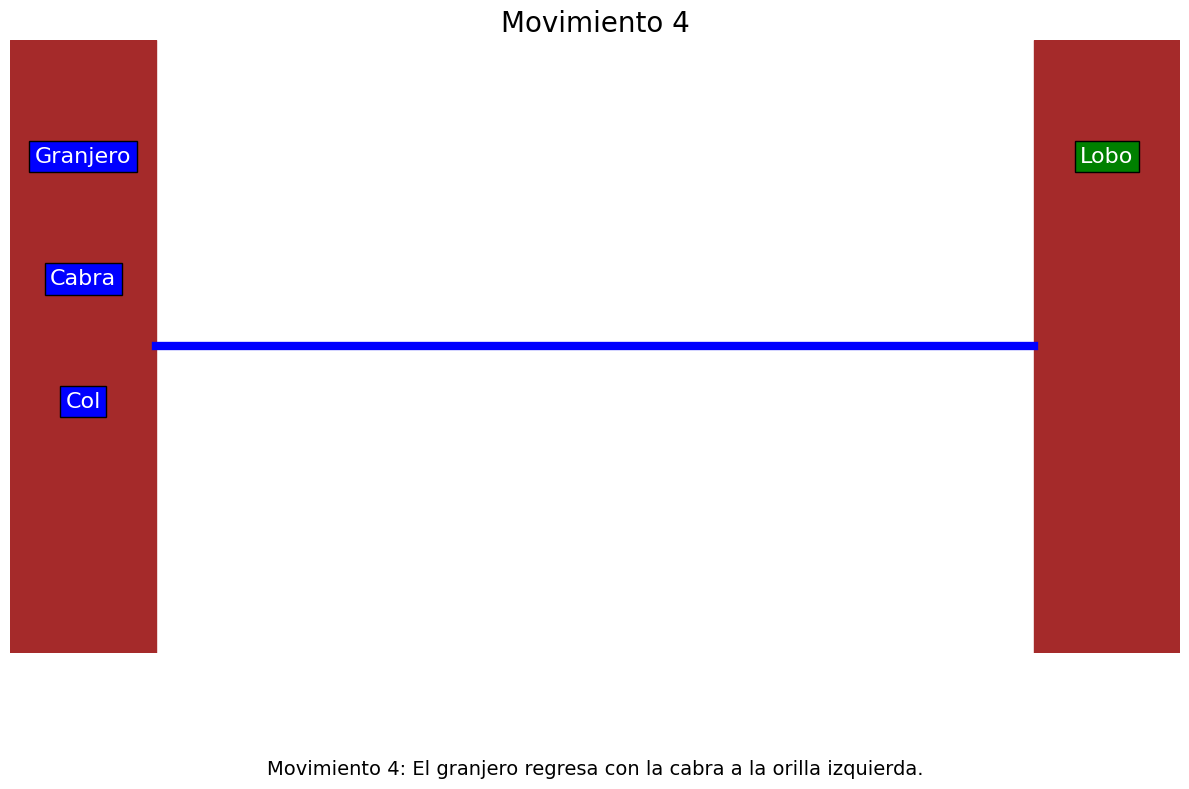

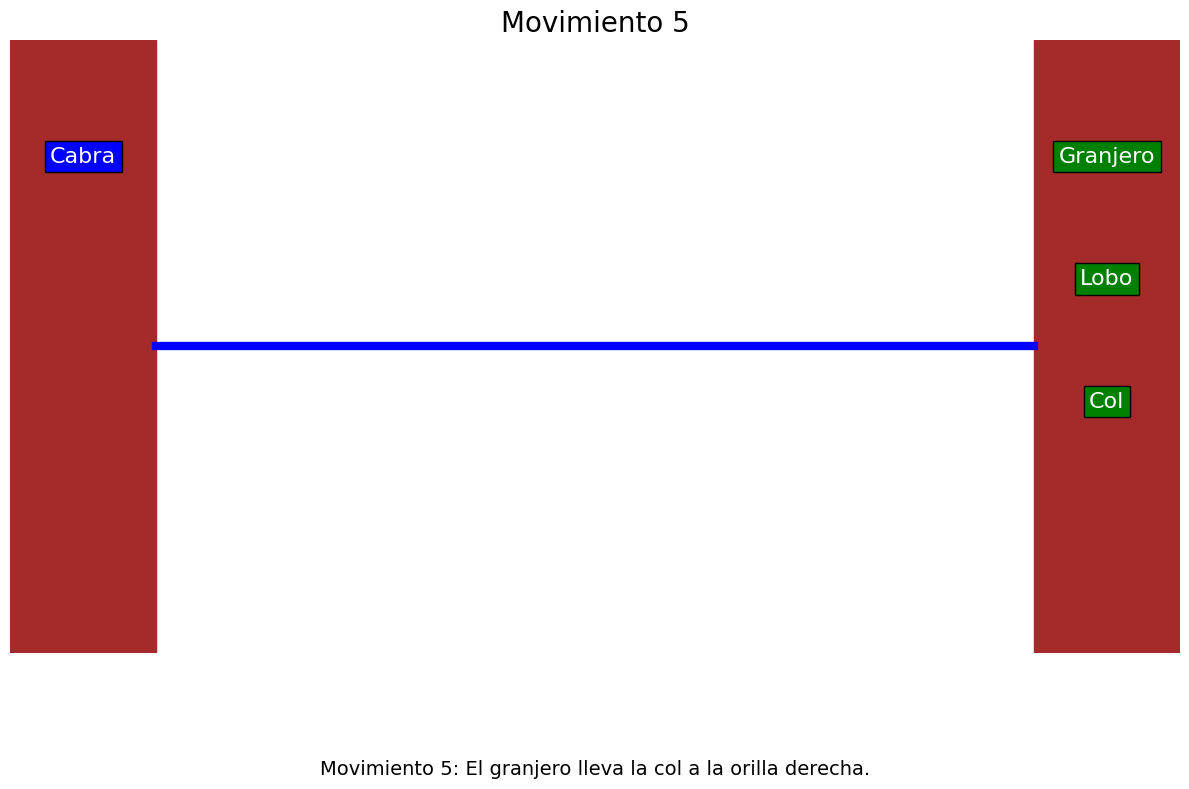

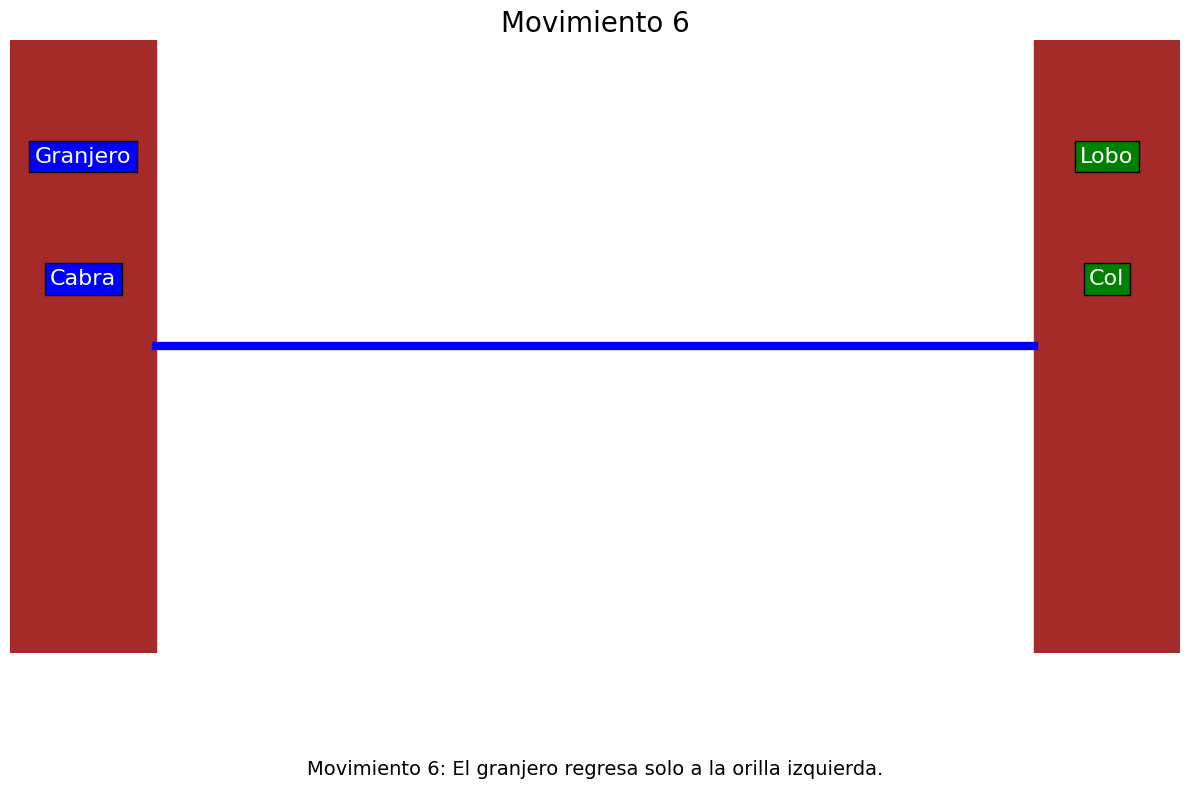

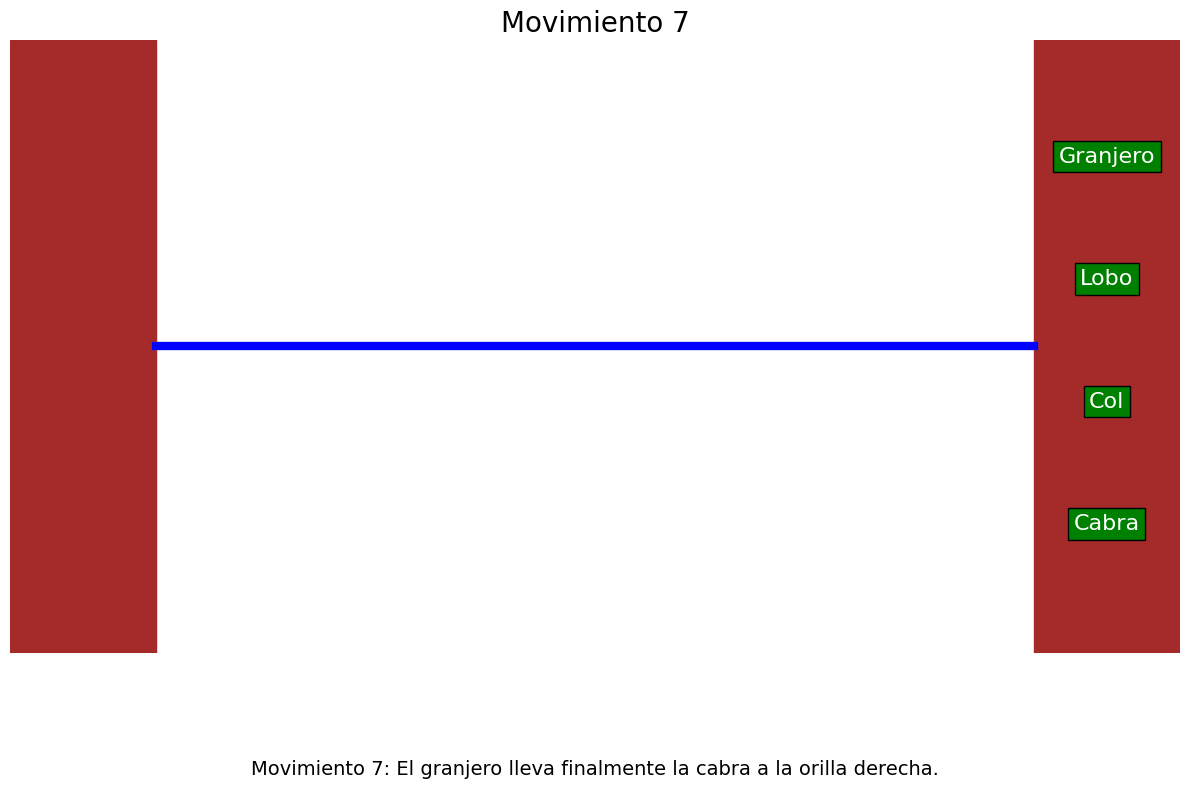

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Rectangle

# Lista de estados para cada movimiento
movimientos = [
    (['Lobo', 'Col'], ['Granjero', 'Cabra']),  # Movimiento 1: El granjero lleva la cabra
    (['Granjero', 'Lobo', 'Col'], ['Cabra']),  # Movimiento 2: El granjero regresa solo
    (['Col'], ['Granjero', 'Cabra', 'Lobo']),  # Movimiento 3: El granjero lleva el lobo
    (['Granjero', 'Cabra', 'Col'], ['Lobo']),  # Movimiento 4: El granjero regresa con la cabra
    (['Cabra'], ['Granjero', 'Lobo', 'Col']),  # Movimiento 5: El granjero lleva la col
    (['Granjero', 'Cabra'], ['Lobo', 'Col']),  # Movimiento 6: El granjero regresa solo
    ([], ['Granjero', 'Lobo', 'Col', 'Cabra'])  # Movimiento 7: El granjero lleva la cabra
]

# Lista de explicaciones para cada movimiento
explicaciones = [
    "Movimiento 1: El granjero lleva la cabra a la orilla derecha.",
    "Movimiento 2: El granjero regresa solo a la orilla izquierda.",
    "Movimiento 3: El granjero lleva el lobo a la orilla derecha.",
    "Movimiento 4: El granjero regresa con la cabra a la orilla izquierda.",
    "Movimiento 5: El granjero lleva la col a la orilla derecha.",
    "Movimiento 6: El granjero regresa solo a la orilla izquierda.",
    "Movimiento 7: El granjero lleva finalmente la cabra a la orilla derecha."
]

# Función para crear la representación del grafo
def crear_grafo(movimientos):
    G = nx.DiGraph()
    for paso, (izquierda, derecha) in enumerate(movimientos):
        nodo_actual = f"Paso {paso}: Izquierda {izquierda}, Derecha {derecha}"
        if paso > 0:
            nodo_anterior = f"Paso {paso-1}: Izquierda {movimientos[paso-1][0]}, Derecha {movimientos[paso-1][1]}"
            G.add_edge(nodo_anterior, nodo_actual)
        G.add_node(nodo_actual)
    return G

# Dibujar el grafo
def dibujar_grafo(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight='bold', arrows=True)
    plt.title("Grafo de decisiones del problema del granjero")
    plt.show()

# Crear el grafo
G = crear_grafo(movimientos)

# Dibujar el grafo
dibujar_grafo(G)

# Función para dibujar el estado con explicación
def dibujar_estado_con_explicacion(orilla_izquierda, orilla_derecha, paso, explicacion):
    fig, ax = plt.subplots(figsize=(12, 8))  # Aumenta el tamaño del gráfico para mejor visibilidad

    # Dibujar orillas
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=True, color='brown', label='Orilla Izquierda'))
    ax.add_patch(Rectangle((7, 0), 1, 1, fill=True, color='brown', label='Orilla Derecha'))
    
    # Añadir objetos a la orilla izquierda (color azul)
    for i, obj in enumerate(orilla_izquierda):
        ax.text(0.5, 0.8 - i * 0.2, obj, fontsize=16, ha='center', color='white', bbox=dict(facecolor='blue', edgecolor='black'))
    
    # Añadir objetos a la orilla derecha (color verde)
    for i, obj in enumerate(orilla_derecha):
        ax.text(7.5, 0.8 - i * 0.2, obj, fontsize=16, ha='center', color='white', bbox=dict(facecolor='green', edgecolor='black'))

    # Añadir río
    ax.plot([1, 7], [0.5, 0.5], color='blue', lw=6, label='Río')

    # Añadir el título y la explicación
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.set_title(f'Movimiento {paso + 1}', fontsize=20)
    
    # Añadir la explicación debajo del gráfico
    plt.text(0.5, -0.2, explicacion, fontsize=14, ha='center', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.show()

# Ciclo para mostrar cada estado después de cada movimiento con explicación
for paso, (izquierda, derecha) in enumerate(movimientos):
    dibujar_estado_con_explicacion(izquierda, derecha, paso, explicaciones[paso])


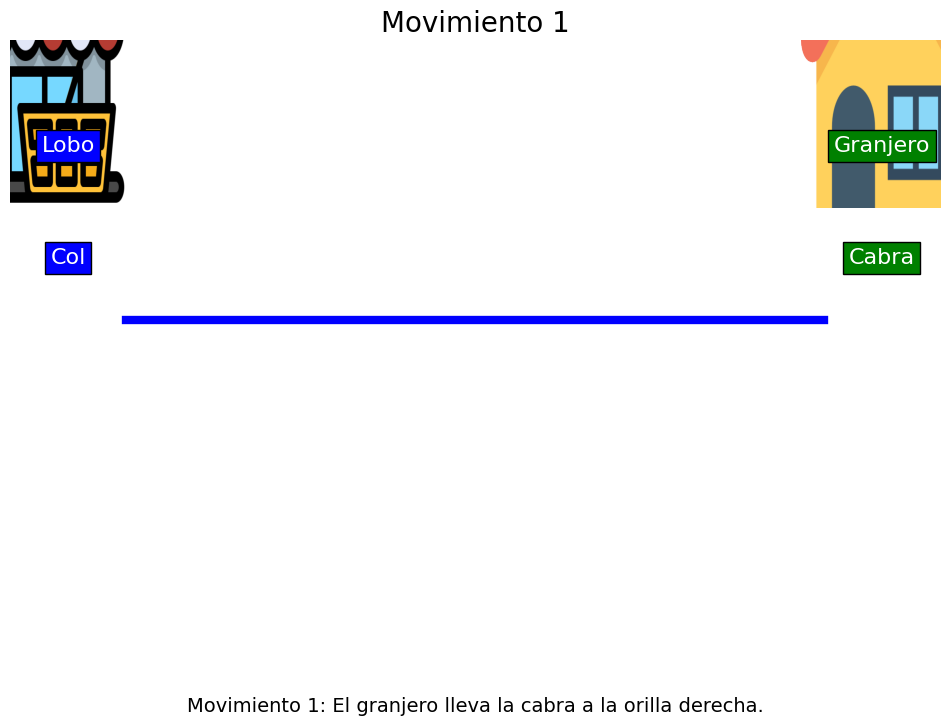

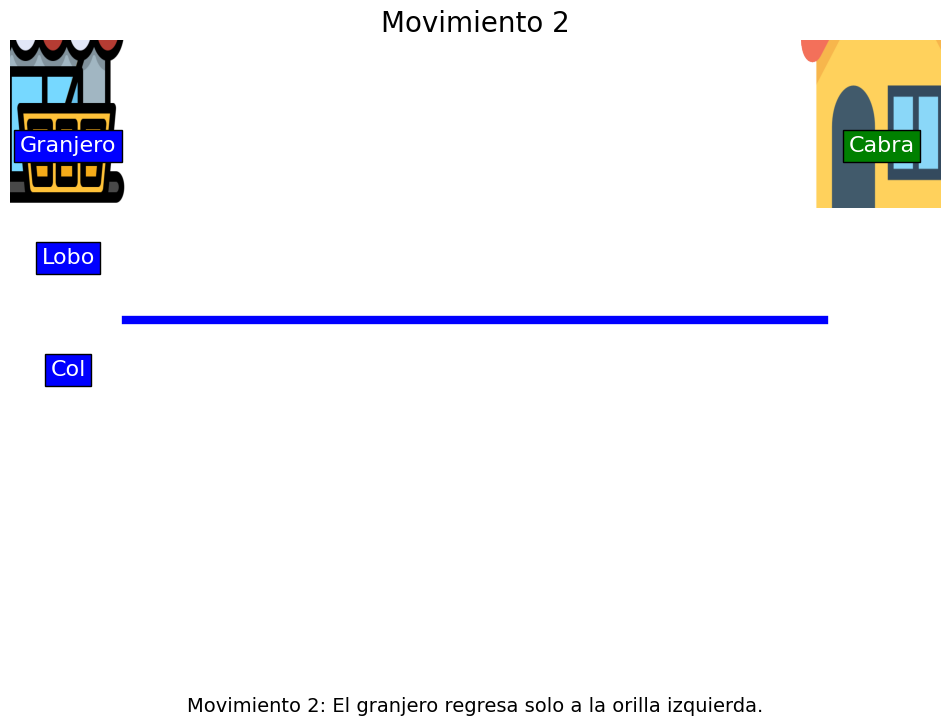

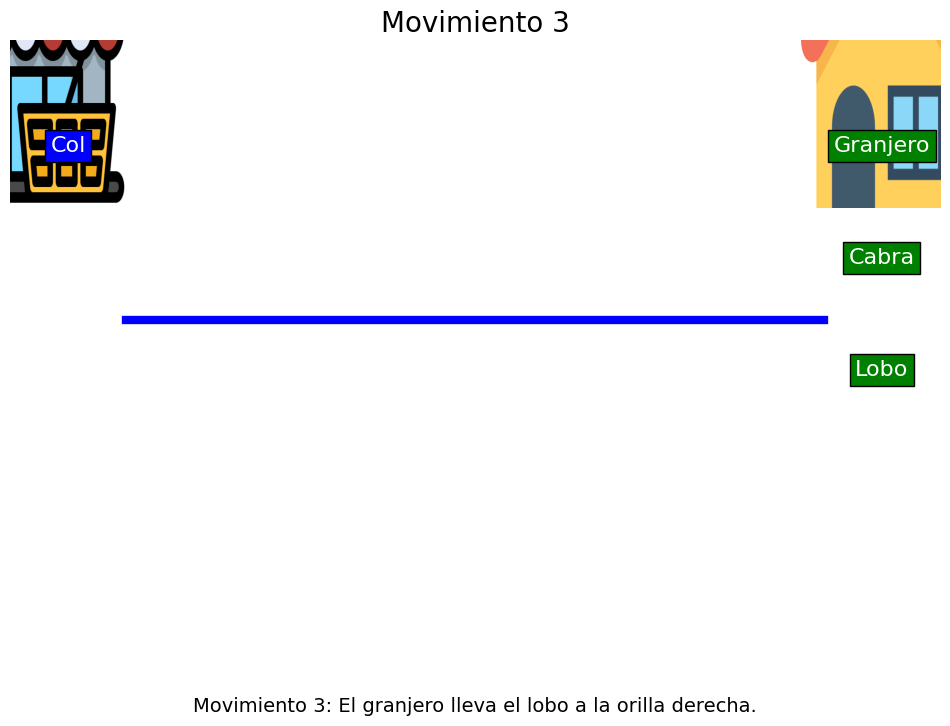

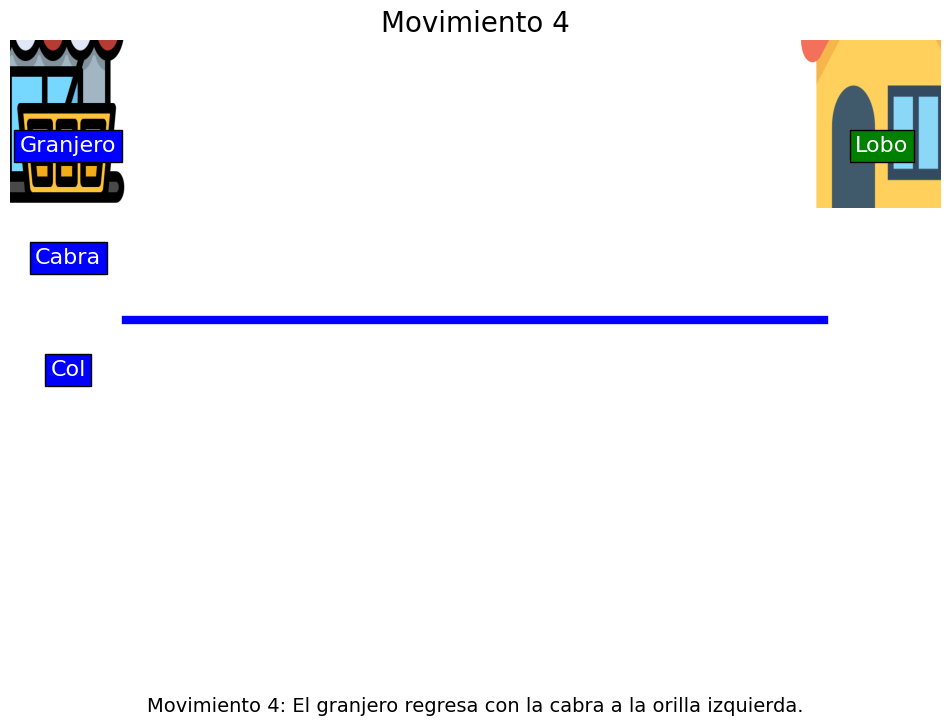

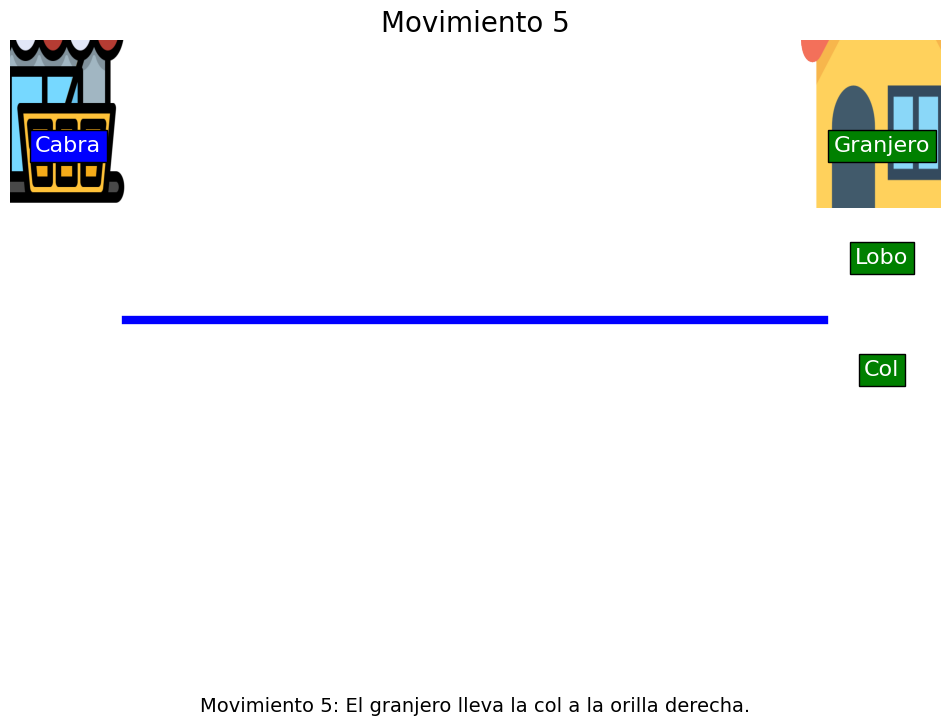

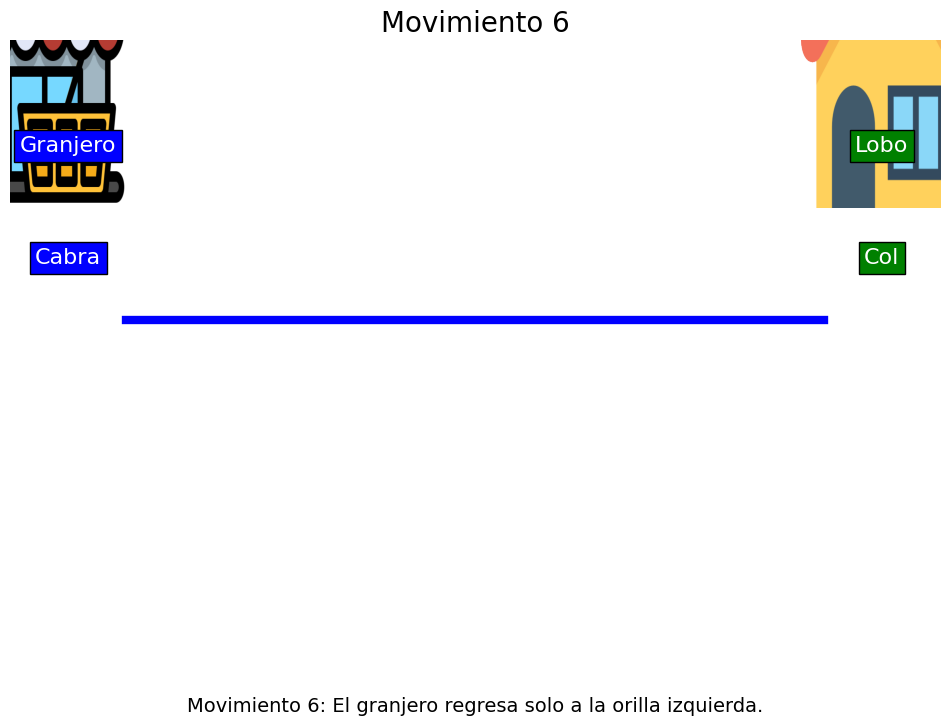

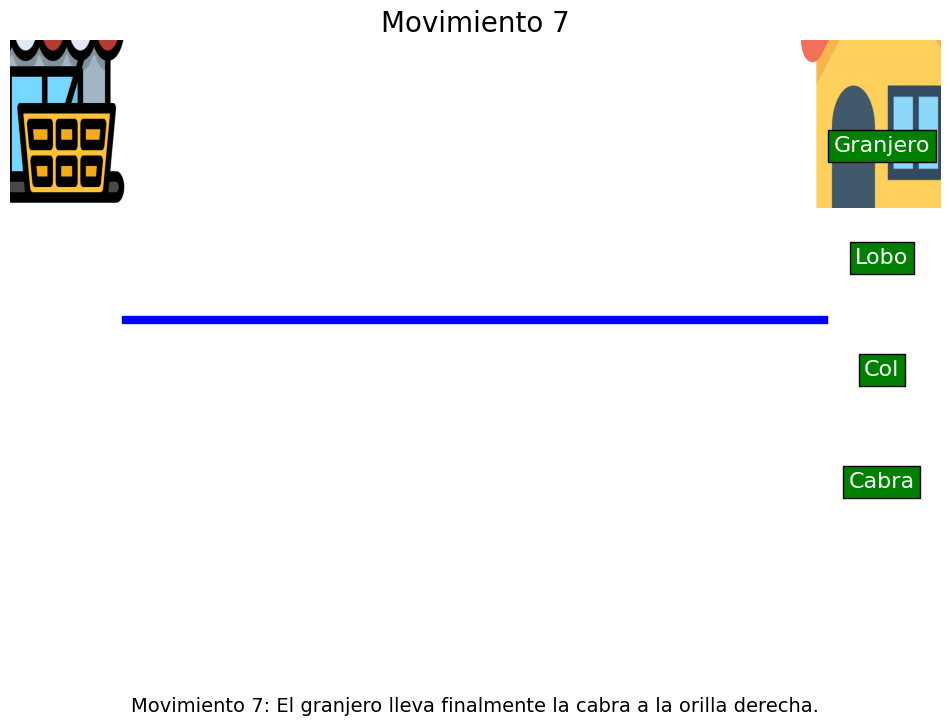

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

# Cargar las imágenes locales (casa.png y mercado.png)
img_mercado = mpimg.imread('mercado.png')  # Reemplaza con la ruta correcta si es necesario
img_casa = mpimg.imread('casa.png')        # Reemplaza con la ruta correcta si es necesario

# Lista de estados para cada movimiento, reflejando los cambios correctos
movimientos = [
    (['Lobo', 'Col'], ['Granjero', 'Cabra']),  # Movimiento 1: El granjero lleva la cabra
    (['Granjero', 'Lobo', 'Col'], ['Cabra']),  # Movimiento 2: El granjero regresa solo
    (['Col'], ['Granjero', 'Cabra', 'Lobo']),  # Movimiento 3: El granjero lleva el lobo
    (['Granjero', 'Cabra', 'Col'], ['Lobo']),  # Movimiento 4: El granjero regresa con la cabra
    (['Cabra'], ['Granjero', 'Lobo', 'Col']),  # Movimiento 5: El granjero lleva la col
    (['Granjero', 'Cabra'], ['Lobo', 'Col']),  # Movimiento 6: El granjero regresa solo
    ([], ['Granjero', 'Lobo', 'Col', 'Cabra'])  # Movimiento 7: El granjero lleva la cabra
]

# Lista de explicaciones para cada movimiento
explicaciones = [
    "Movimiento 1: El granjero lleva la cabra a la orilla derecha.",
    "Movimiento 2: El granjero regresa solo a la orilla izquierda.",
    "Movimiento 3: El granjero lleva el lobo a la orilla derecha.",
    "Movimiento 4: El granjero regresa con la cabra a la orilla izquierda.",
    "Movimiento 5: El granjero lleva la col a la orilla derecha.",
    "Movimiento 6: El granjero regresa solo a la orilla izquierda.",
    "Movimiento 7: El granjero lleva finalmente la cabra a la orilla derecha."
]

# Función para dibujar el estado con explicación y con imágenes más pequeñas
def dibujar_estado_con_explicacion(orilla_izquierda, orilla_derecha, paso, explicacion):
    fig, ax = plt.subplots(figsize=(12, 8))  # Aumentamos el tamaño del gráfico para mejor visibilidad

    # Añadir objetos a la orilla izquierda (color azul)
    for i, obj in enumerate(orilla_izquierda):
        ax.text(0.5, 0.8 - i * 0.2, obj, fontsize=16, ha='center', color='white', bbox=dict(facecolor='blue', edgecolor='black'))
    
    # Añadir objetos a la orilla derecha (color verde)
    for i, obj in enumerate(orilla_derecha):
        ax.text(7.5, 0.8 - i * 0.2, obj, fontsize=16, ha='center', color='white', bbox=dict(facecolor='green', edgecolor='black'))

    # Añadir la imagen del mercado en la orilla izquierda (imagen más pequeña)
    ax.imshow(img_mercado, extent=[-0.5, 1, 0.7, 1.3], aspect='auto')  # Ajusta la posición y tamaño de la imagen

    # Añadir la imagen de la casa en la orilla derecha (imagen más pequeña)
    ax.imshow(img_casa, extent=[6.8, 8.3, 0.7, 1.3], aspect='auto')  # Ajusta la posición y tamaño de la imagen

    # Añadir río
    ax.plot([1, 7], [0.5, 0.5], color='blue', lw=6, label='Río')

    # Añadir el título y la explicación
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 1)
    ax.axis('off')  # Elimina el fondo de las orillas y las líneas de los ejes
    ax.set_title(f'Movimiento {paso + 1}', fontsize=20)
    
    # Añadir la explicación debajo del gráfico
    plt.text(0.5, -0.2, explicacion, fontsize=14, ha='center', transform=ax.transAxes)
    
    plt.subplots_adjust(top=0.85, bottom=0.15)
    
    plt.show()

# Ciclo para mostrar cada estado después de cada movimiento con explicación e imágenes de "Mercado" y "Casa"
for paso, (izquierda, derecha) in enumerate(movimientos):
    dibujar_estado_con_explicacion(izquierda, derecha, paso, explicaciones[paso])
